In [14]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [15]:
n = 2         
Simon_C = QuantumCircuit(2*n,n) 

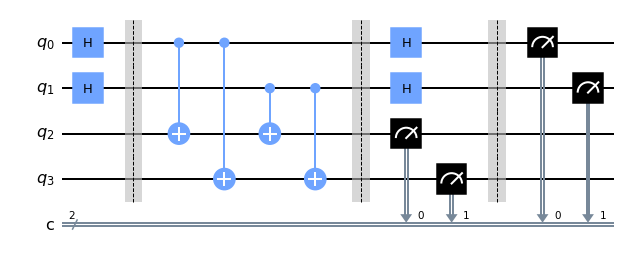

In [16]:
for i in range(n):
    Simon_C.h(i)

Simon_C.barrier()

Simon_C.cx(0,n)
Simon_C.cx(0,n+1)
Simon_C.cx(1,n)
Simon_C.cx(1,n+1)

Simon_C.barrier()

Simon_C.measure(n, 0)
Simon_C.measure(n+1, 1)

for i in range(n):
    Simon_C.h(i)

Simon_C.barrier()

Simon_C.measure(0, 0)
Simon_C.measure(1, 1)

Simon_C.draw(output='mpl')

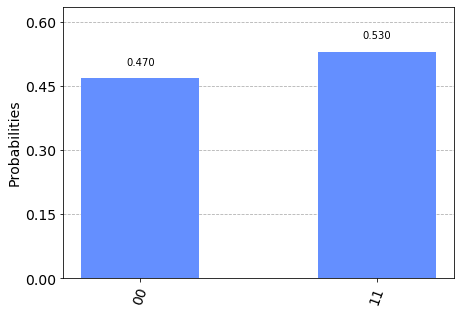

In [17]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(Simon_C, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)